In [778]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  # Add this import statement
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.metrics import classification_report

df = pd.read_csv('masked_kiva_loans.csv')

# Data Visualise 

In [779]:
df.head()

,id,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date
0,1242201,500,500,Agriculture,Pakistan,245.0,14,14,female,monthly,2/20/2017
1,1165778,325,325,Agriculture,Philippines,145.0,14,13,female,irregular,10/11/2016
2,1123052,800,800,Agriculture,Ecuador,159.0,14,29,female,bullet,7/25/2016
3,1312344,425,425,Agriculture,Philippines,136.0,8,1,female,irregular,6/2/2017
4,861422,275,275,Agriculture,Kenya,133.0,12,11,female,monthly,3/25/2015


In [780]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33561 entries, 0 to 33560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  33561 non-null  int64  
 1   funded_amount       33561 non-null  int64  
 2   loan_amount         33561 non-null  int64  
 3   sector              33561 non-null  object 
 4   country             33561 non-null  object 
 5   partner_id          32927 non-null  float64
 6   term_in_months      33561 non-null  int64  
 7   lender_count        33561 non-null  int64  
 8   borrower_genders    33366 non-null  object 
 9   repayment_interval  33561 non-null  object 
 10  date                33561 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.8+ MB


In [781]:
df.describe(include = 'all')

,id,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date
count,3.356100e+04,33561.000000,33561.000000,33561,33561,32927.000000,33561.000000,33561.000000,33366,33561,33561
unique,NaN,NaN,NaN,15,79,NaN,NaN,NaN,1032,4,1284
top,NaN,NaN,NaN,Agriculture,Philippines,NaN,NaN,NaN,female,monthly,11/18/2016
freq,NaN,NaN,NaN,9015,8096,NaN,NaN,NaN,21264,17237,74
mean,9.931834e+05,789.871279,843.059653,NaN,NaN,177.819145,13.691428,20.549179,NaN,NaN,NaN
std,1.965757e+05,1177.245363,1222.188679,NaN,NaN,93.838691,8.566574,28.514324,NaN,NaN,NaN
min,6.530490e+05,0.000000,25.000000,NaN,NaN,9.000000,1.000000,0.000000,NaN,NaN,NaN
25%,8.217790e+05,250.000000,275.000000,NaN,NaN,126.000000,8.000000,7.000000,NaN,NaN,NaN
50%,9.945450e+05,450.000000,500.000000,NaN,NaN,145.000000,13.000000,13.000000,NaN,NaN,NaN
75%,1.164156e+06,900.000000,975.000000,NaN,NaN,204.000000,14.000000,24.000000,NaN,NaN,NaN


In [782]:
# Check for duplicate rows
print(df.isnull().sum())

id                      0
funded_amount           0
loan_amount             0
sector                  0
country                 0
partner_id            634
term_in_months          0
lender_count            0
borrower_genders      195
repayment_interval      0
date                    0
dtype: int64


In [783]:
countries = df['country'].value_counts()[df['country'].value_counts()>340]
list_countries = list(countries.index) 

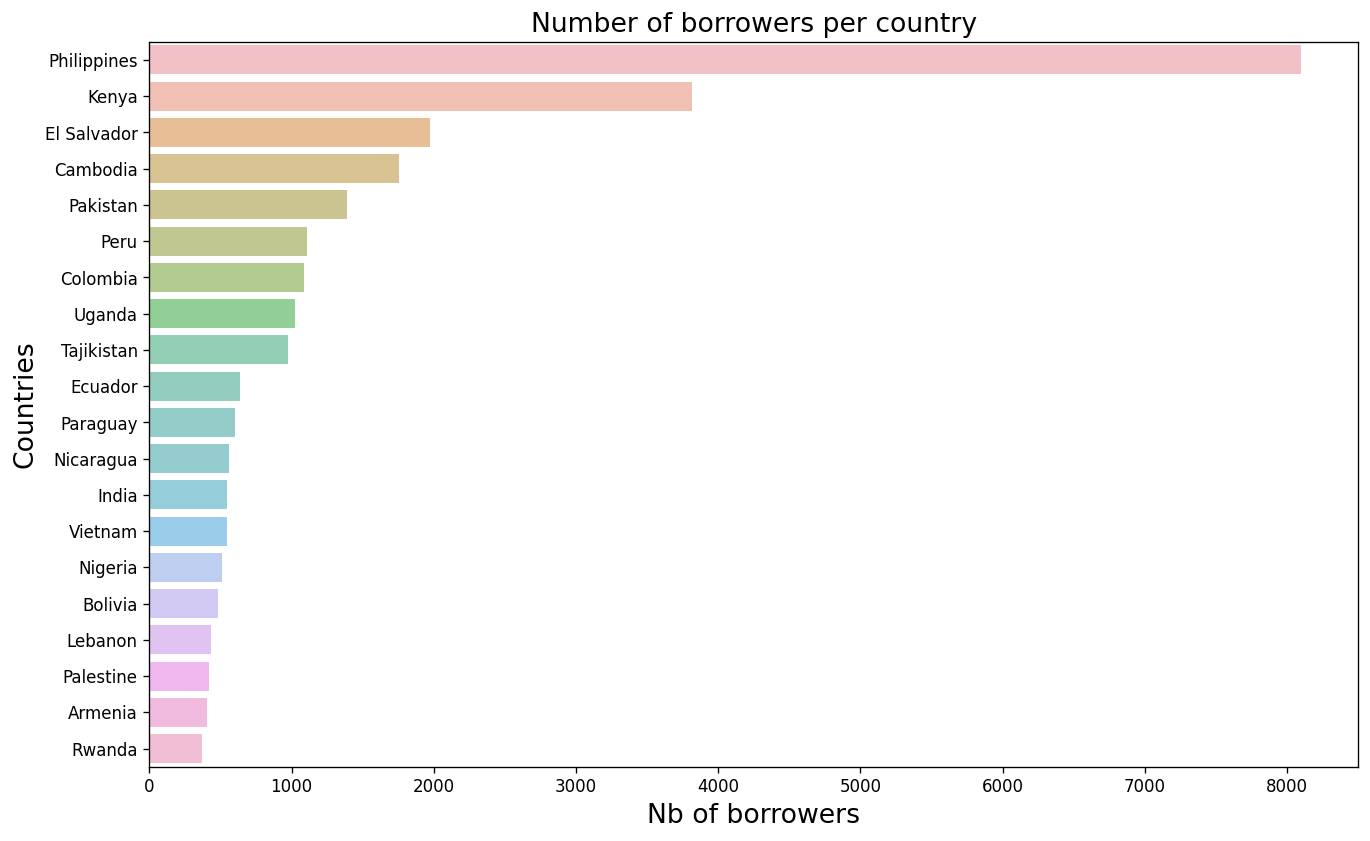

In [784]:
plt.figure(figsize=(13,8))
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.title("Number of borrowers per country", fontsize=16)
plt.xlabel("Nb of borrowers", fontsize=16)
plt.ylabel("Countries", fontsize=16)
plt.show();

In [785]:


df['borrower_genders']=[elem if elem in ['female','male'] else 'group' for elem in df['borrower_genders'] ]
#to replace values such as "woman, woman, woman, man"

borrowers = df['borrower_genders'].value_counts()
labels = (np.array(borrowers.index))
values = (np.array((borrowers / borrowers.sum())*100))

trace = go.Pie(labels=labels, values=values,
              hoverinfo='label+percent',
               textfont=dict(size=20),
                showlegend=True)

layout = go.Layout(
    title="Borrowers' genders"
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Borrowers_genders")

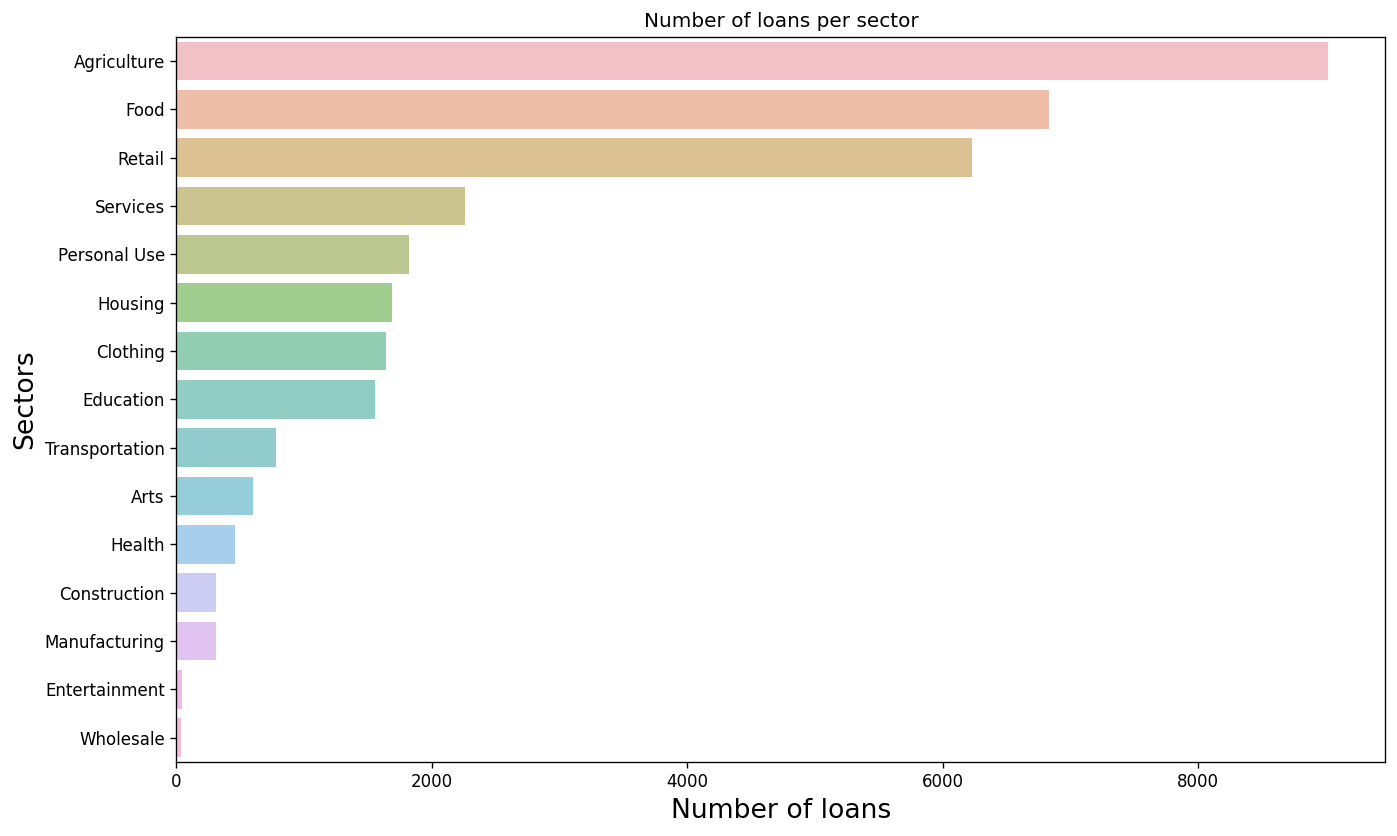

In [786]:
plt.figure(figsize=(13,8))
sectors = df['sector'].value_counts()
sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.xlabel('Number of loans', fontsize=16)
plt.ylabel("Sectors", fontsize=16)
plt.title("Number of loans per sector")
plt.show();

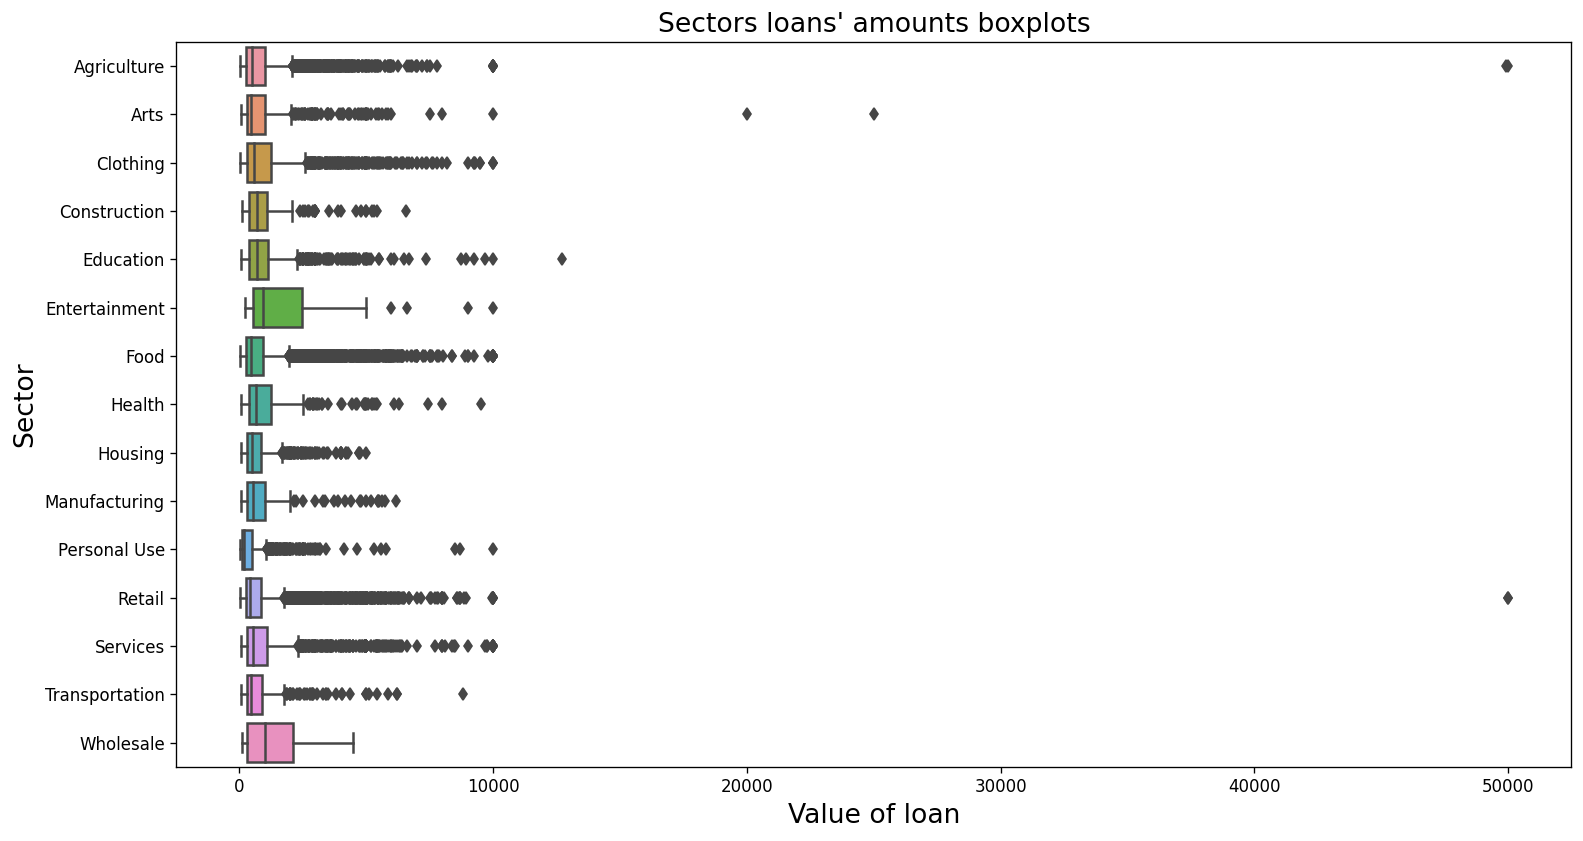

In [787]:
plt.figure(figsize=(15,8))
sns.boxplot(x='loan_amount', y="sector", data=df)
plt.xlabel("Value of loan", fontsize=16)
plt.ylabel("Sector", fontsize=16)
plt.title("Sectors loans' amounts boxplots", fontsize=16)
plt.show();

# Data Cleaning

In [788]:

# Check for duplicate rows
print("dublicates = ",df.duplicated().sum())

dublicates =  0


In [789]:

# Check for missing values
print(df.isnull().sum())

id                      0
funded_amount           0
loan_amount             0
sector                  0
country                 0
partner_id            634
term_in_months          0
lender_count            0
borrower_genders        0
repayment_interval      0
date                    0
dtype: int64


In [790]:
df.dropna(inplace=True)
print(df.isnull().sum())

id                    0
funded_amount         0
loan_amount           0
sector                0
country               0
partner_id            0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
date                  0
dtype: int64


In [791]:
# Drop columns with high number of unique values
df = df.drop(['borrower_genders'], axis=1)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)  # Set 'date' as the index

# Remove outliers in funded amount
Q1 = df['funded_amount'].quantile(0.25)
Q3 = df['funded_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['funded_amount'] >= lower_bound) & (df['funded_amount'] <= upper_bound)]

# Remove outliers in loan amount
Q1 = df['loan_amount'].quantile(0.25)
Q3 = df['loan_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['loan_amount'] >= lower_bound) & (df['loan_amount'] <= upper_bound)]

# Remove outliers in lender count
Q1 = df['lender_count'].quantile(0.25)
Q3 = df['lender_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['lender_count'] >= lower_bound) & (df['lender_count'] <= upper_bound)]

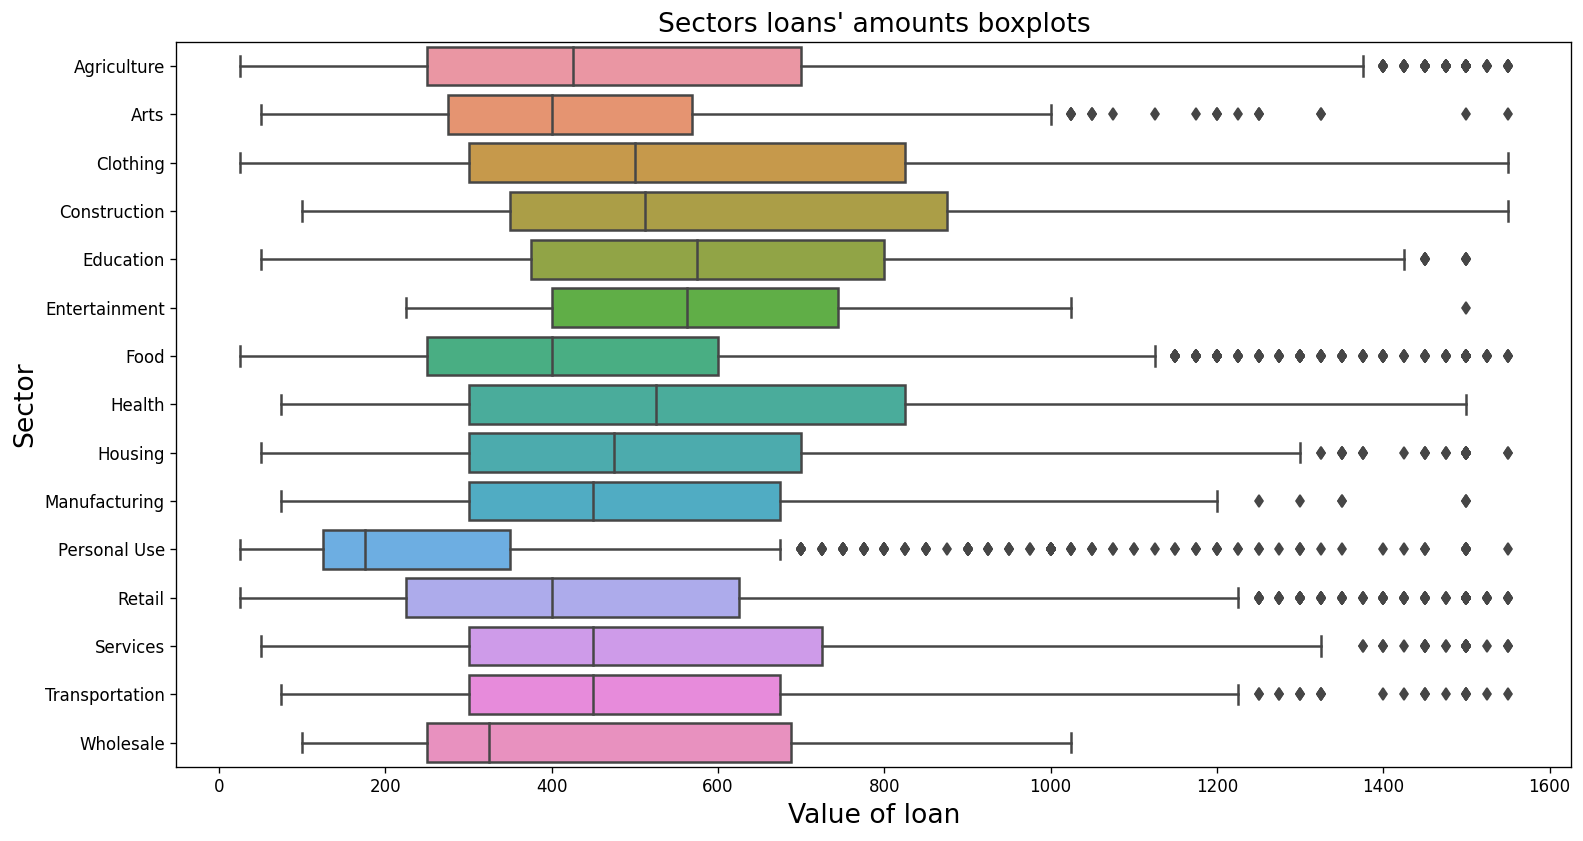

In [792]:
plt.figure(figsize=(15,8))
sns.boxplot(x='loan_amount', y="sector", data=df)
plt.xlabel("Value of loan", fontsize=16)
plt.ylabel("Sector", fontsize=16)
plt.title("Sectors loans' amounts boxplots", fontsize=16)
plt.show();

#  Evaluate a machine learning mode

In [793]:
# Define a function to evaluate and print metrics for regression models
def evaluate_regression_model(rmodel,X_test,X_train, Y_test,Y_train):
    y_test_pred = rmodel.predict(X_test)
    y_train_pred = rmodel.predict(X_train)
    mse_test = mean_squared_error(Y_test, y_test_pred)
    r2_test = r2_score(Y_test, y_test_pred)
    mse_train = mean_squared_error(Y_train, y_train_pred)
    r2_train = r2_score(Y_train, y_train_pred)
    print("Mean Squared Error (MSE)_test:", mse_test)
    print("R-squared (R2) score_test:", r2_test,"\n######\n")
    print("Mean Squared Error (MSE)_train:", mse_train)
    print("R-squared (R2) score_train:", r2_train)
    return mse, r2

In [794]:
# Define a function to evaluate and print metrics for classification models
def evaluate_classification_model(cmodel, X_test,X_train, y_test,y_train):
    y_test_pred = cmodel.predict(X_test)
    y_train_pred = cmodel.predict(X_train)
    confusion_mat = confusion_matrix(y_test, y_test_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Confusion Matrix:\n", confusion_mat,)
    print("train_accuracy:", train_accuracy)
    print("test_accuracy:", test_accuracy,"\n######\n")
    # Generate the classification report
    report = classification_report(y_test_class, y_test_pred)

    # Print the report
    print(report)

In [795]:
# Train and evaluate multiple regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
    
}

In [796]:
# Split the data into training and testing sets
X = df[['loan_amount', 'lender_count']]
y = df['funded_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for name, model in models.items():
    print("\n----------------\n", name,"\n----------------")
    model.fit(X_train, y_train)
    mse, r2 = evaluate_regression_model(model, X_test,X_train, y_test,y_train)


----------------
 Linear Regression 
----------------
Mean Squared Error (MSE)_test: 10774.572773233353
R-squared (R2) score_test: 0.8853379959050738 
######

Mean Squared Error (MSE)_train: 11309.966016872582
R-squared (R2) score_train: 0.8792310294701252

----------------
 Decision Tree Regressor 
----------------
Mean Squared Error (MSE)_test: 12479.663787943427
R-squared (R2) score_test: 0.8671925754762841 
######

Mean Squared Error (MSE)_train: 5017.979828022169
R-squared (R2) score_train: 0.9464174996577497

----------------
 Random Forest Regressor 
----------------
Mean Squared Error (MSE)_test: 10002.83760028096
R-squared (R2) score_test: 0.8935507300360356 
######

Mean Squared Error (MSE)_train: 5299.916060104761
R-squared (R2) score_train: 0.9434069558194312


In [797]:

# Train and evaluate a classification model (Ridge Classifier)
X_class = df[['loan_amount', 'lender_count', 'term_in_months']]
y_class = np.where(df['funded_amount'] > df['funded_amount'].median(), 1, 0)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

classifier = RidgeClassifier()
classifier.fit(X_train_class, y_train_class)
evaluate_classification_model(classifier, X_test_class,X_train_class, y_test_class,y_train_class)

Confusion Matrix:
 [[2958   78]
 [ 594 1980]]
train_accuracy: 0.8825548226065252
test_accuracy: 0.8802139037433155 
######

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      3036
           1       0.96      0.77      0.85      2574

    accuracy                           0.88      5610
   macro avg       0.90      0.87      0.88      5610
weighted avg       0.89      0.88      0.88      5610



# Time Sereis

In [798]:

df.to_csv('cleaned_kiva_loans.csv', index=False)

In [799]:

# فرز البيانات حسب عمود التاريخ
df.sort_values('date', inplace=True)



In [800]:

# خطوة 2: تصور السلسلة الزمنية (معاد تشكيلها وتجميعها)
df_resampled = df['funded_amount'].resample('M').sum()  # إعادة تشكيل البيانات بشكل شهري

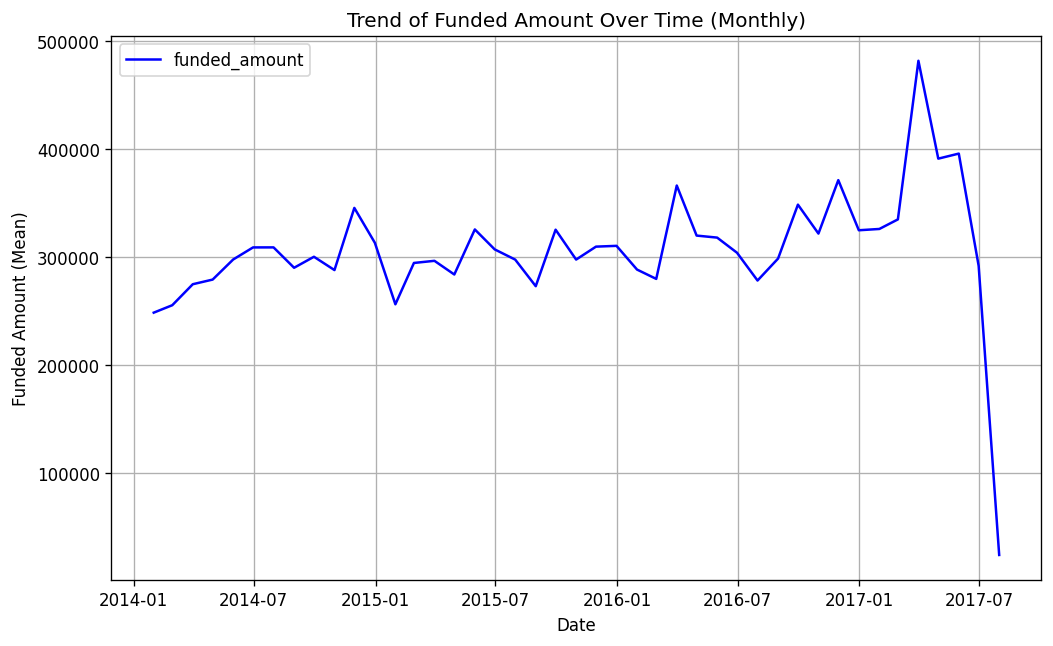

In [801]:
plt.figure(figsize=(10, 6))
plt.plot(df_resampled, label='funded_amount', color='blue')
plt.title('Trend of Funded Amount Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Funded Amount (Mean)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [802]:
# Step 3: Stationarize the series and perform ADF test
def stationarize_series(series):
    rolling_mean = series.rolling(window=12).mean()
    rolling_std = series.rolling(window=12).std()

    plt.figure(figsize=(10, 6))
    plt.plot(series, label='Original', color='blue')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Funded Amount')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    result = adfuller(series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

ADF Statistic: -2.379984539207485
p-value: 0.1474654930883747
Critical Values:
	1%: -3.6327426647230316
	5%: -2.9485102040816327
	10%: -2.6130173469387756
ADF Statistic: -3.653538416999411
p-value: 0.00481622431715659
Critical Values:
	1%: -3.661428725118324
	5%: -2.960525341210433
	10%: -2.6193188033298647
ADF Statistic: -1.735268416551091
p-value: 0.41303881336264064
Critical Values:
	1%: -3.6699197407407405
	5%: -2.9640707407407407
	10%: -2.621171111111111


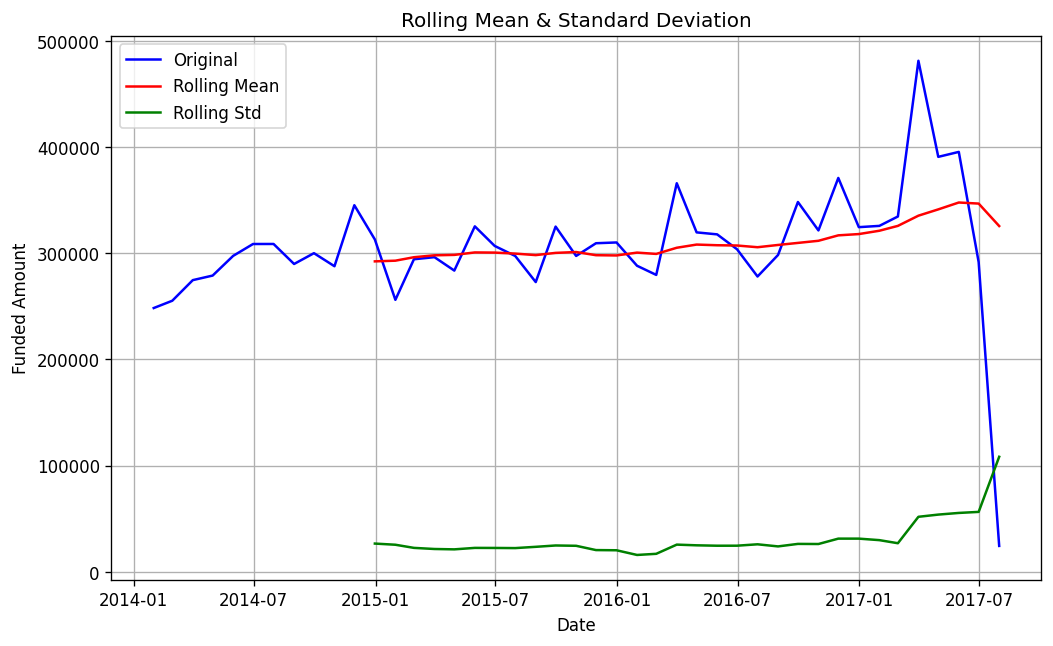

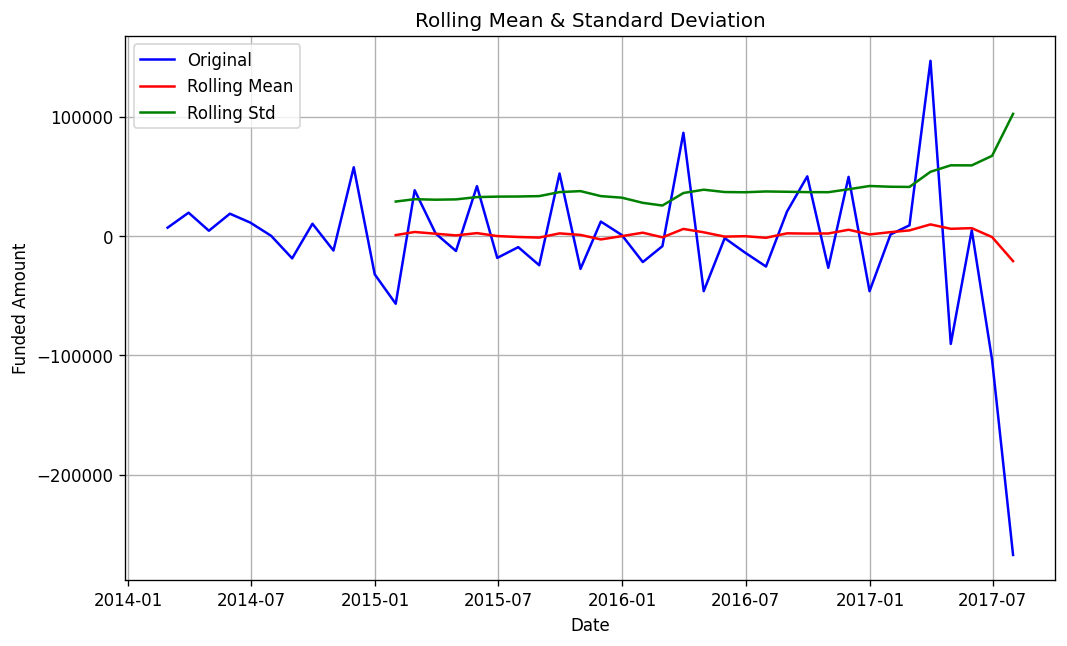

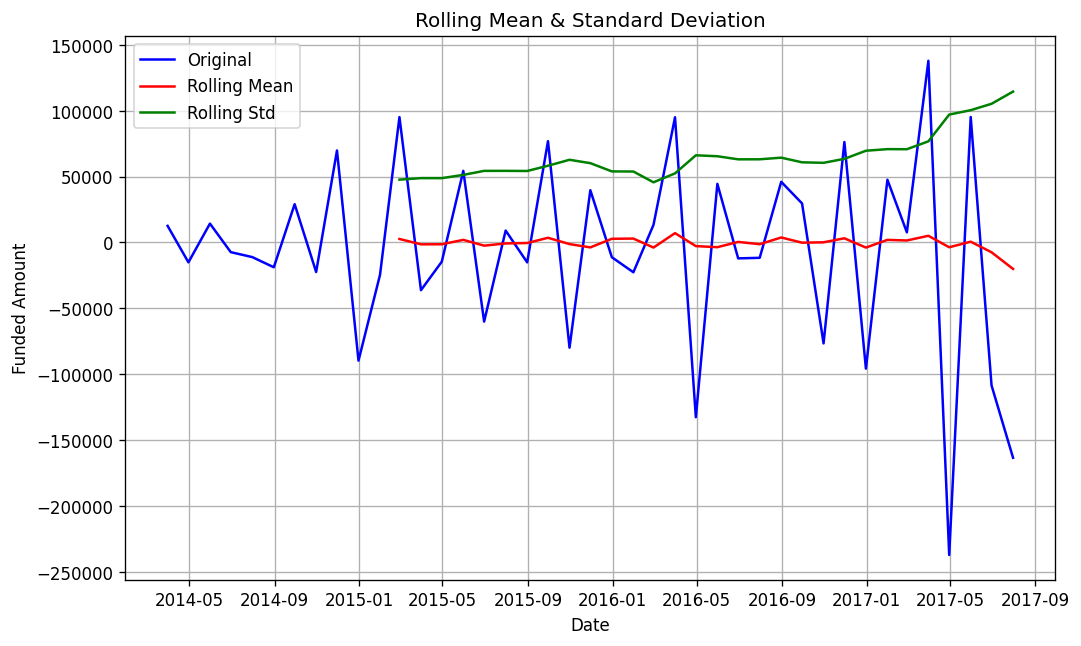

In [803]:
# Check stationarity on the resampled series
stationarize_series(df_resampled)
stationarize_series(df_resampled.diff().dropna())
stationarize_series(df_resampled.diff().diff().dropna())

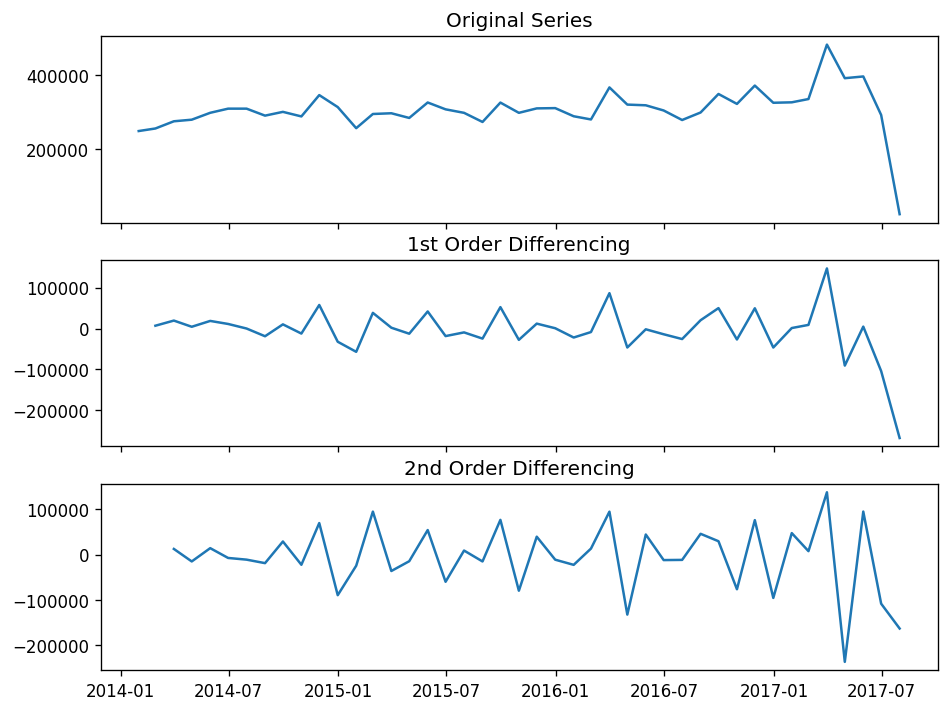

In [804]:
# Step 4: Plot differenced series
plt.rcParams.update({'figure.figsize': (9, 7), 'figure.dpi': 120})

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(df_resampled); ax1.set_title('Original Series')
ax2.plot(df_resampled.diff()); ax2.set_title('1st Order Differencing')
ax3.plot(df_resampled.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

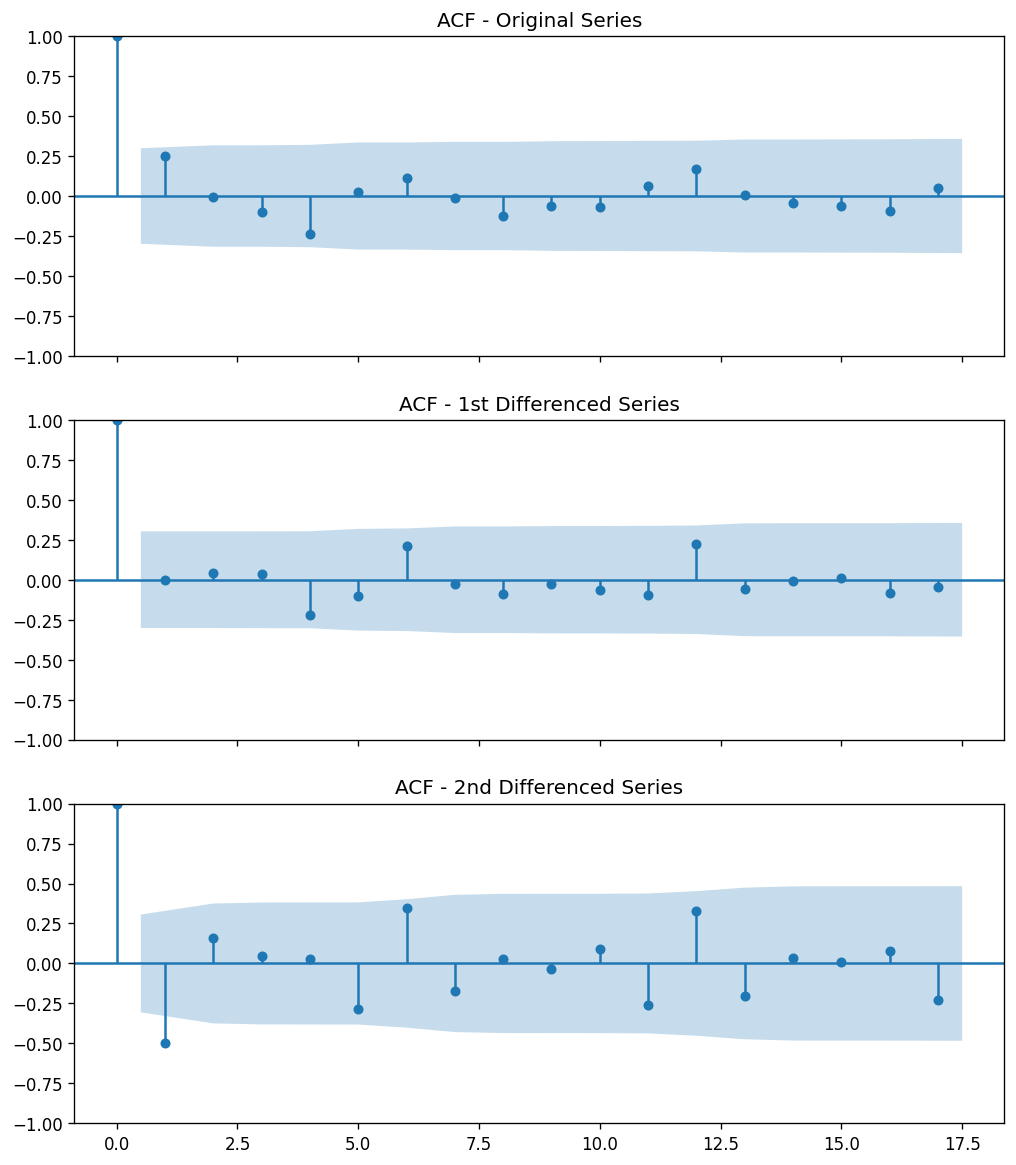

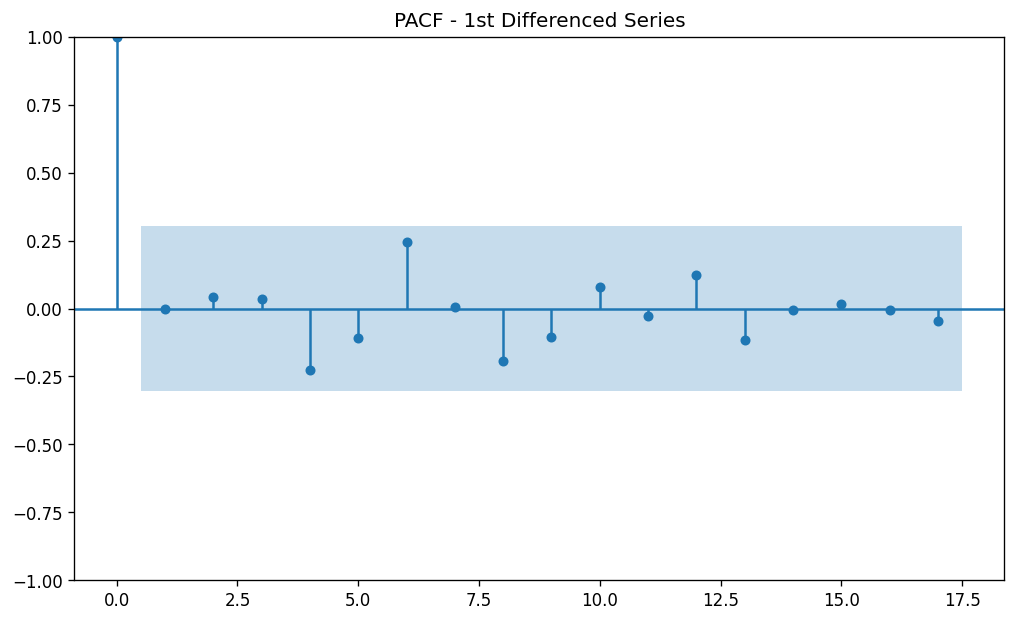

In [805]:
# Step 5: Plot ACF & PACF
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
plot_acf(df_resampled, ax=ax1)
ax1.set_title('ACF - Original Series')
plot_acf(df_resampled.diff().dropna(), ax=ax2)
ax2.set_title('ACF - 1st Differenced Series')
plot_acf(df_resampled.diff().diff().dropna(), ax=ax3)
ax3.set_title('ACF - 2nd Differenced Series')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_pacf(df_resampled.diff().dropna(), ax=ax)
ax.set_title('PACF - 1st Differenced Series')
plt.show()

In [806]:
# Step 6: Build and fit ARIMA model
# Based on ACF and PACF plots, determine the appropriate p, d, q values
model = ARIMA(df_resampled, order=(1, 1, 1))  # Adjust order based on ACF/PACF plots
arima_model = model.fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:          funded_amount   No. Observations:                   43
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -521.374
Date:                Sat, 18 May 2024   AIC                           1048.747
Time:                        23:52:00   BIC                           1053.960
Sample:                    01-31-2014   HQIC                          1050.658
                         - 07-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4342     14.986      0.029      0.977     -28.939      29.807
ma.L1         -0.4014     14.972     -0.027      0.979     -29.745      28.943
sigma2       3.87e+09   1.94e-07   1.99e+16      0.0

/opt/python/envs/default/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/python/envs/default/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



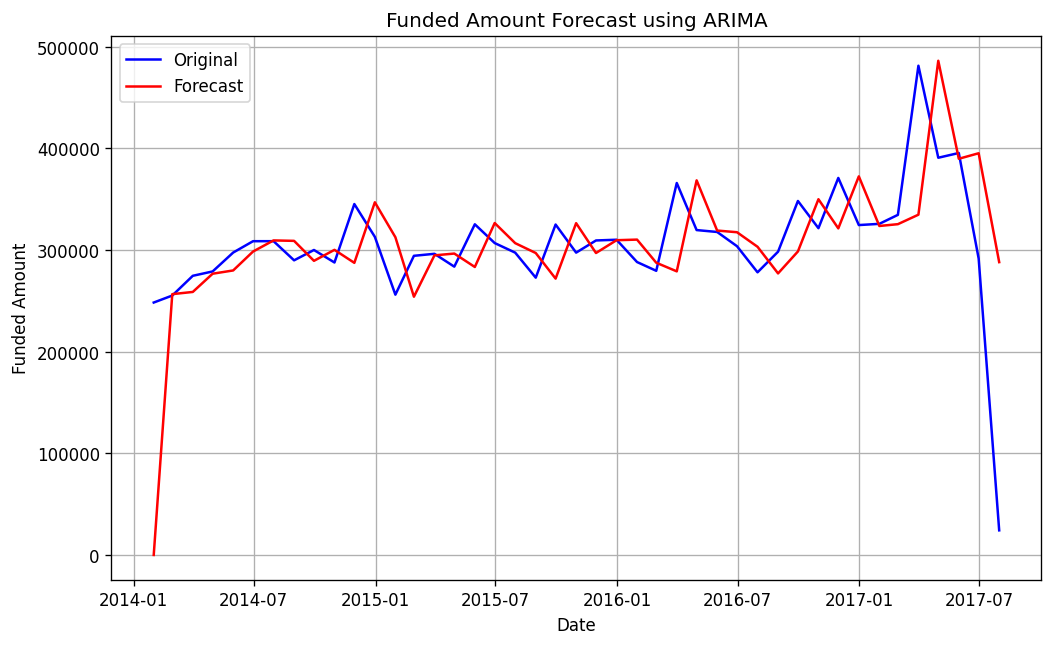

In [807]:
# Step 7: Forecasting
forecast = arima_model.predict(start=df_resampled.index[0], end=df_resampled.index[-1], dynamic=False)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled, label='Original', color='blue')
plt.plot(df_resampled.index, forecast, label='Forecast', color='red')
plt.title('Funded Amount Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Funded Amount')
plt.legend(loc='best')
plt.grid(True)
plt.show()

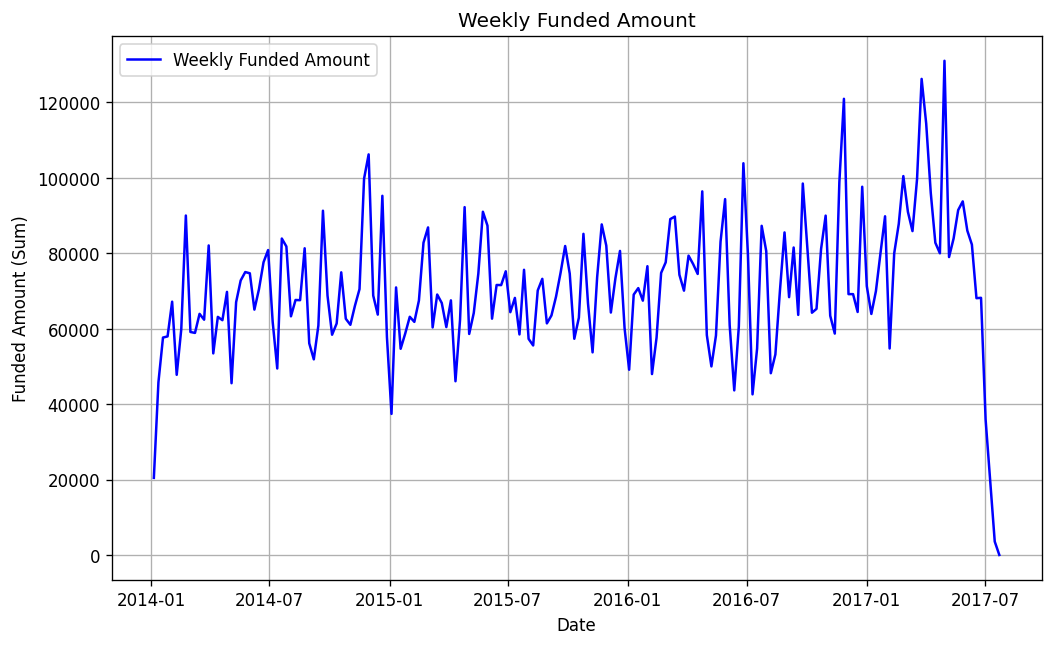

In [808]:
# Step 8: Weekly resampling
weekly_funded_amount = df['funded_amount'].resample('W').sum()

plt.figure(figsize=(10, 6))
plt.plot(weekly_funded_amount.index, weekly_funded_amount, label='Weekly Funded Amount', color='blue')
plt.title('Weekly Funded Amount')
plt.xlabel('Date')
plt.ylabel('Funded Amount (Sum)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

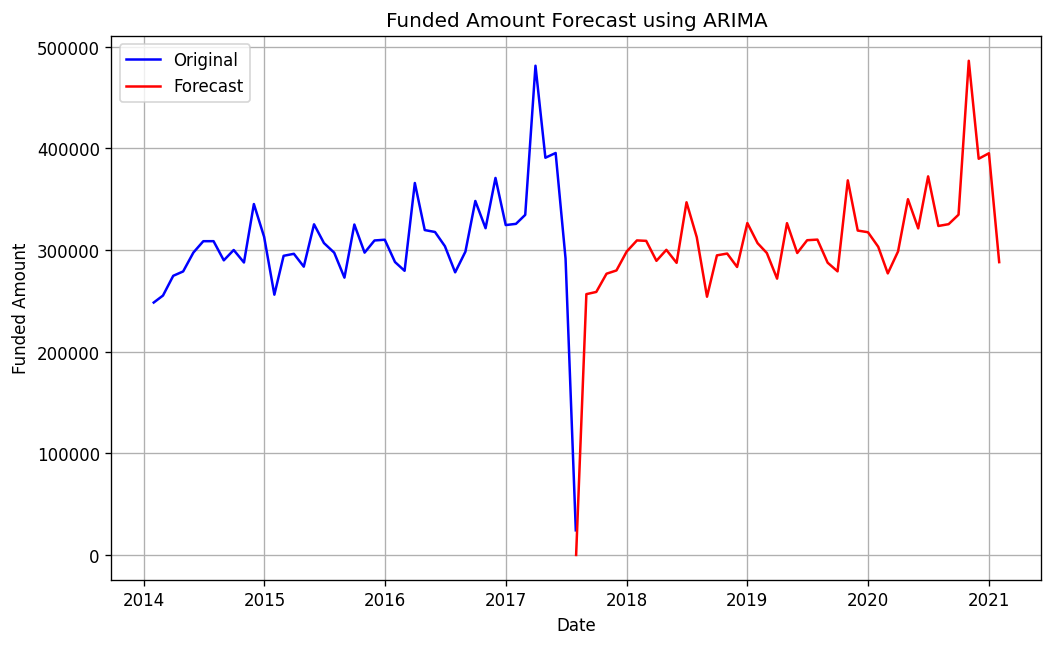

In [809]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled, label='Original', color='blue')
plt.plot(pd.date_range(start=df_resampled.index[-1], periods=43, freq='MS'), forecast, label='Forecast', color='red')
plt.title('Funded Amount Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Funded Amount')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# sectors

In [810]:
# Group by sector and date, then sum the funded amounts
sector_funding = df.groupby(['sector', pd.Grouper(freq='M')])['funded_amount'].sum().reset_index()

# Pivot the data to have sectors as columns and dates as index
sector_funding_pivot = sector_funding.pivot(index='date', columns='sector', values='funded_amount')

In [811]:
# Display the pivoted data
print(sector_funding_pivot.head())

sector      Agriculture    Arts  Clothing  Construction  Education  \
date                                                                 
2014-01-31      52200.0  3300.0   11950.0        4975.0    19900.0   
2014-02-28      52850.0  4550.0   14375.0        2875.0    14925.0   
2014-03-31      70075.0  2250.0   20150.0        4825.0     8800.0   
2014-04-30      60725.0  2925.0   13850.0        1825.0    11825.0   
2014-05-31      76750.0  2550.0   16625.0        3025.0     9300.0   

sector      Entertainment     Food  Health  Housing  Manufacturing  \
date                                                                 
2014-01-31            NaN  49725.0   200.0  22175.0         2825.0   
2014-02-28            NaN  63000.0  3975.0  12375.0         1500.0   
2014-03-31            NaN  64300.0  2025.0  16425.0         4875.0   
2014-04-30          800.0  57750.0  4475.0  19150.0         4100.0   
2014-05-31          600.0  58550.0  1325.0  19225.0         4350.0   

sector      Person

In [812]:
# Sum the total funding for each sector across the entire timeframe
total_funding_by_sector = sector_funding_pivot.sum()

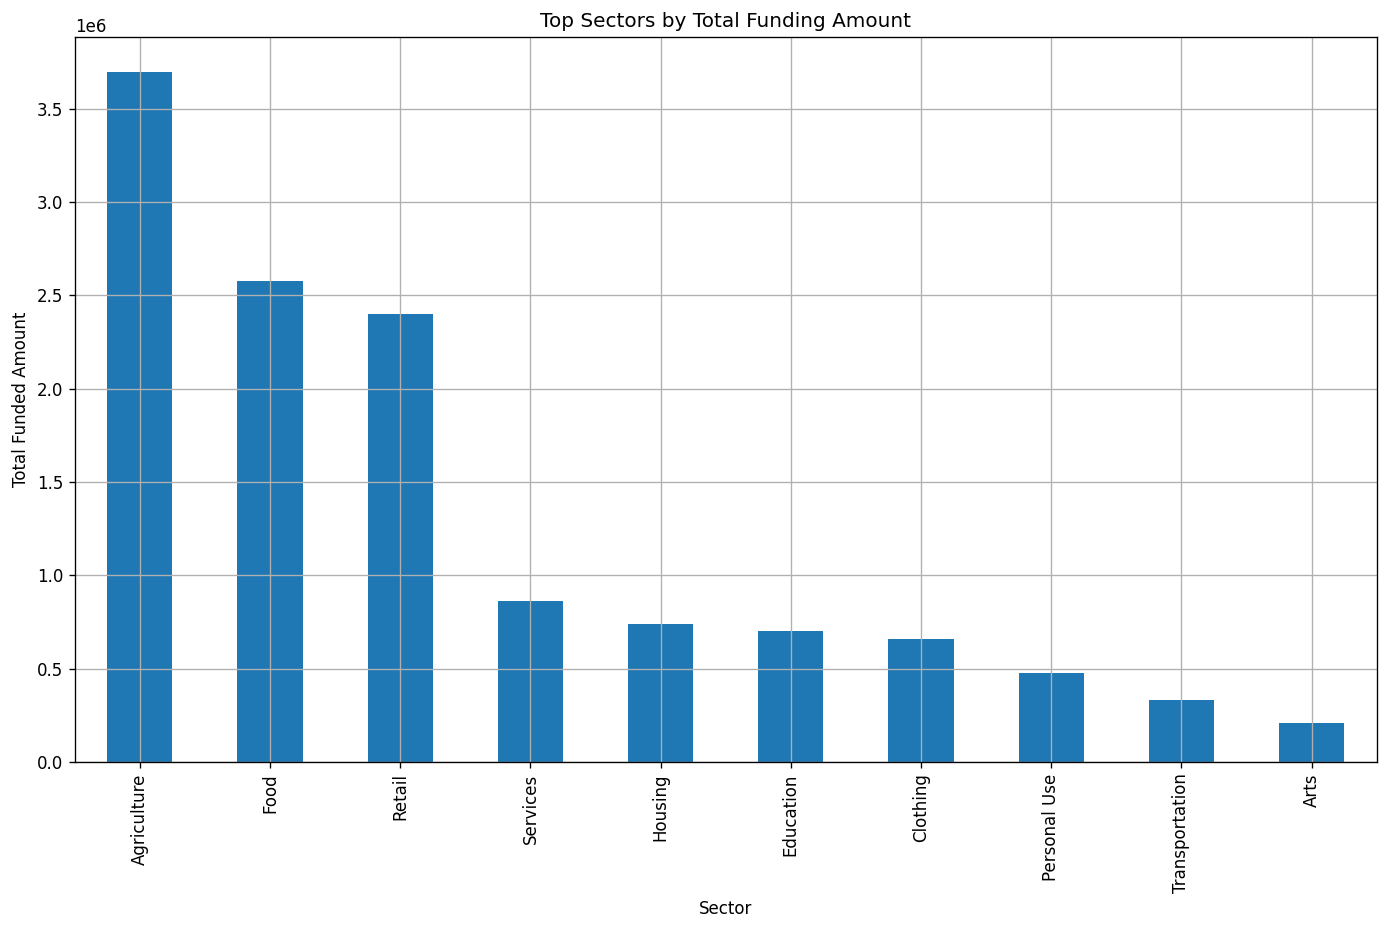

In [813]:
# Sort the sectors by total funding
top_sectors = total_funding_by_sector.sort_values(ascending=False).head(10)  # Top 10 sectors

# Plot the top sectors by total funding
plt.figure(figsize=(14, 8))
top_sectors.plot(kind='bar')
plt.title('Top Sectors by Total Funding Amount')
plt.xlabel('Sector')
plt.ylabel('Total Funded Amount')
plt.grid(True)
plt.show()

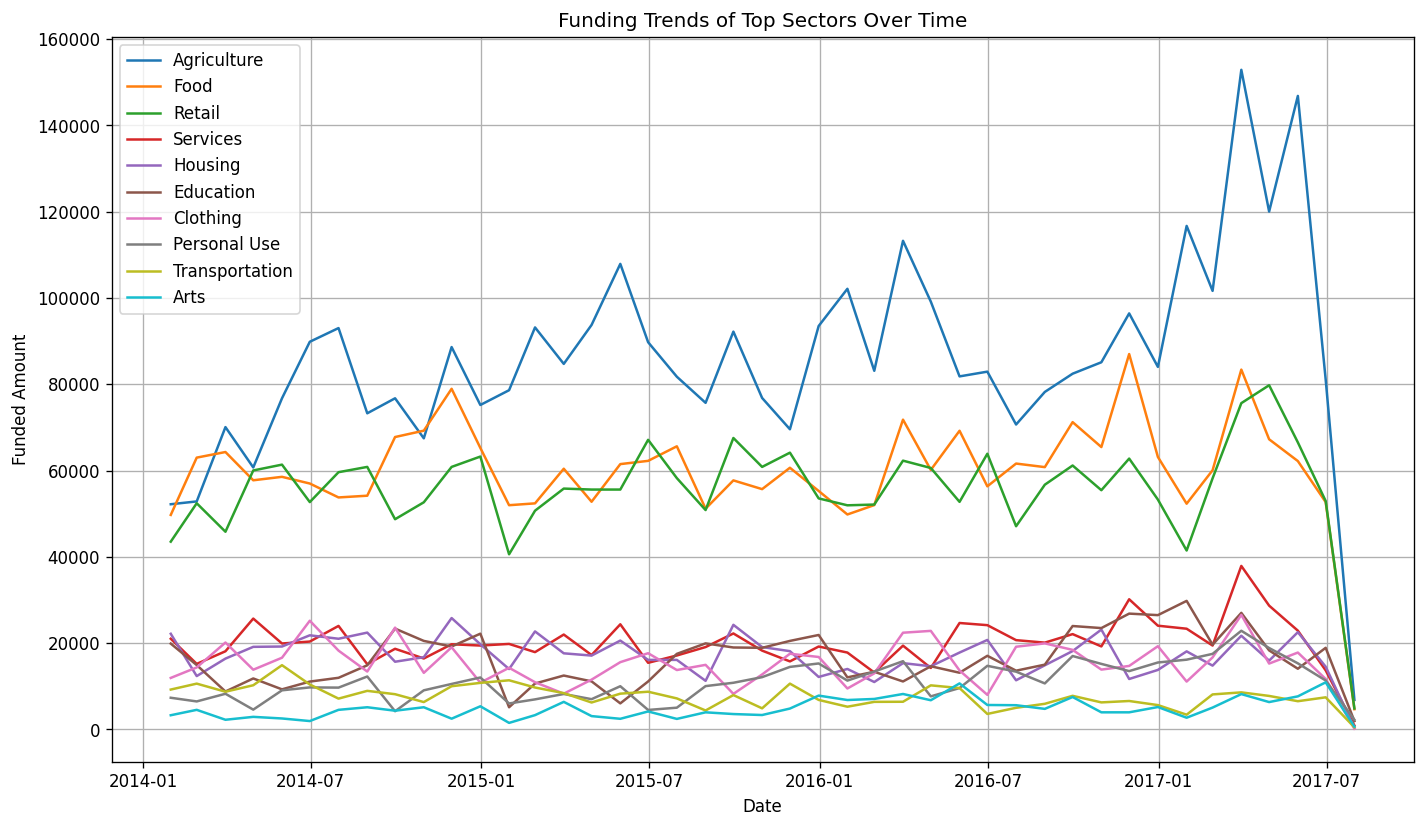

In [775]:
# Select the top sectors from the pivot table
top_sectors_data = sector_funding_pivot[top_sectors.index]

# Plot the funding trends of the top sectors over time
plt.figure(figsize=(14, 8))
for sector in top_sectors_data.columns:
    plt.plot(top_sectors_data.index, top_sectors_data[sector], label=sector)

plt.title('Funding Trends of Top Sectors Over Time')
plt.xlabel('Date')
plt.ylabel('Funded Amount')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# *correlation*

In [776]:

correlation = df['lender_count'].corr(df['funded_amount'])
print(f"Correlation between number of lenders and funded amount: {correlation}")
print("Very Strong Correlation")

Correlation between number of lenders and funded amount: 0.8170975391216053
Very Strong Correlation
